# Nonlinear Equations

We want to find a root of the nonlinear function $f$ using different methods.

1. Bisection method
2. Newton method
3. Chord method
4. Secant method
5. Fixed point iterations





In [26]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
import sympy as sym


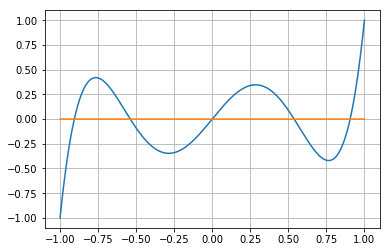

In [27]:
t = sym.symbols('t')

f_sym = t/8. * (63.*t**4 - 70.*t**2. +15.) # Legendre polynomial of order 5

f_prime_sym = sym.diff(f_sym,t)

f = sym.lambdify(t, f_sym, 'numpy')
f_prime = sym.lambdify(t,f_prime_sym, 'numpy')

phi = lambda x : 63./70.*x**3 + 15./(70.*x)
#phi = lambda x : 70.0/15.0*x**3 - 63.0/15.0*x**5
#phi = lambda x : sqrt((63.*x**4 + 15.0)/70.)

# Let's plot
n = 1025

x = linspace(-1,1,n)
c = zeros_like(x)

_ = plot(x,f(x))
_ = plot(x,c)
_ = grid()


In [28]:
# Initial data for the variuos algorithms

# interval in which we seek the solution 
a = 0.7
b = 1.

# initial points
x0 = (a+b)/2.0
x00 = b


In [29]:
# stopping criteria
eps = 1e-10
n_max = 1000

## Bisection method

$$
x^k = \frac{a^k+b^k}{2}
$$
```
                   if (f(a_k) * f(x_k)) < 0:
                      b_k1 = x_k
                      a_k1 = a_k
                   else:
                      a_k1 = x_k
                      b_k1 = b_k
```

32
0.90617984595
7.85726162187e-11


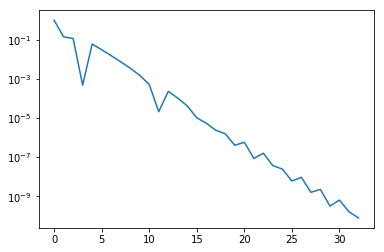

In [30]:
def bisect(f,a,b,eps,n_max):
    a_new = a
    b_new = b
    x = mean([a,b])
    err = eps + 1.
    errors = [err]
    it = 0
    while (err > eps and it < n_max):
        if ( f(a_new) * f(x) < 0 ):
            # root in (a_new,x)
            b_new = x
        else:
            # root in (x,b_new)
            a_new = x
        
        x_new = mean([a_new,b_new])
        
        #err = 0.5 *(b_new -a_new)
        err = abs(f(x_new))
        #err = abs(x-x_new)
        
        errors.append(err)
        x = x_new
        it += 1
    
    semilogy(errors)
    print(it)
    print(x)
    print(err)
    return errors
              
errors_bisect = bisect(f,a,b,eps,n_max)


             
        

In [31]:
# There are no results in theory which guarantee monotonic error convergence

In [32]:
# is the number of iterations coherent with the theoretical estimation?

In order to find out other methods for solving non-linear equations, let's compute the Taylor's series of $f(x^k)$ up to the first order 

$$
f(x^k) \simeq f(x^k) + (x-x^k)f^{\prime}(x^k)
$$
which suggests the following iterative scheme
$$
x^{k+1} = x^k - \frac{f(x^k)}{f^{\prime}(x^k)}
$$

The following methods are obtained applying the above scheme where

$$
f^{\prime}(x^k) \approx q^k
$$

## Newton's method
$$
q^k = f^{\prime}(x^k)
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q^k}
$$

5
0.906179845939
5.63394568471e-15
CPU times: user 48 ms, sys: 0 ns, total: 48 ms
Wall time: 47.9 ms


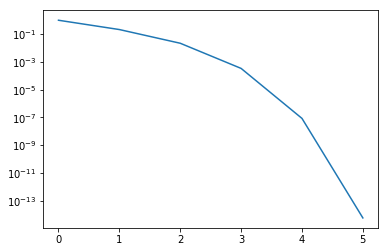

In [33]:
def newton(f,f_prime,x0,eps,n_max):
    
    x = x0
    err = eps + 1.
    errors = [err]
    it = 0
    
    while (err > eps and it < n_max):
        
        q = f_prime(x)
        if abs(q) < 1e-12:
            raise RuntimeError("f_prime close to zero")
        
        x_new = x - f(x)/q
        
        x = x_new
        err = abs(f(x_new))
        # err = abs(x_new - x)
        errors.append(err)
        it += 1
    
    print(it)
    print(x)
    print(err)
    semilogy(errors)
    return errors

%time errors_newton = newton(f,f_prime,1.0,eps,n_max)

## Chord method

$$
q^k \equiv q = \frac{f(b)-f(a)}{b-a}
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q}
$$

31
0.90617984595
7.95851167432e-11


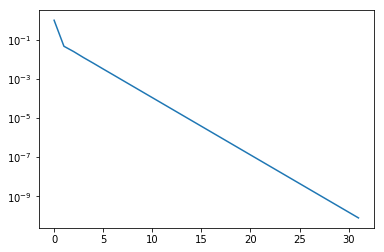

In [43]:
def chord(f,a,b,x0,eps,n_max):
    
    q = (f(b)-f(a)) / (b-a)
    x = x0
    err = eps + 1.
    errors = [err]
    it = 0
    
    while (err > eps and it < n_max):
        
        x_new = x - f(x)/q
        
        x = x_new
        err = abs(f(x_new))
        # err = abs(x_new - x)
        errors.append(err)
        it += 1
    
    print(it)
    print(x)
    print(err)
    semilogy(errors)
    return errors

errors_chord = chord (f,a,b,x0,eps,n_max)

## Secant method

$$
q^k = \frac{f(x^k)-f(x^{k-1})}{x^k - x^{k-1}}
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q^k}
$$

Note that this algorithm requirs **two** initial points

7
0.906179845939
0.0


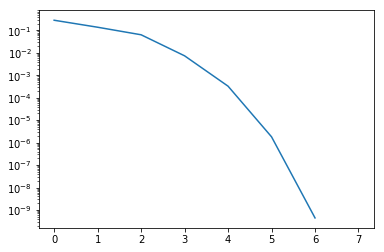

In [44]:
def secant(f,x0,x00,eps,n_max):
    
    x1 = x00
    x2 = x0
    err = abs(f(x0))
    errors = [err]
    it = 0
    
    while (err > eps and it < n_max):
        
        q = (f(x2)-f(x1))/(x2-x1)
        x3 = x2 - f(x2)/q
        
        x1 = x2
        x2 = x3
        err = abs(f(x3))
        # err = abs(x_new - x)
        errors.append(err)
        it += 1
    
    print(it)
    print(x3)
    print(err)
    semilogy(errors)
    return errors
    
errors_secant = secant(f,x0,x00,eps,n_max)

## Fixed point iterations

$$
f(x)=0 \to x-\phi(x)=0
$$

$$
x^{k+1} = \phi(x^k)
$$

11
0.5384693101084483
6.70826929848e-12


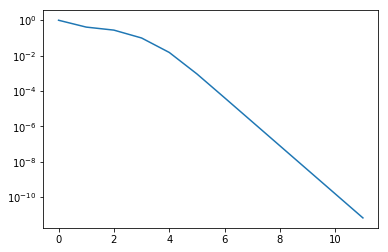

In [46]:
def fixed_point(phi,x0,eps,n_max):
    
    x = x0
    err = eps + 1.
    errors = [err]
    it = 0
    
    while (err > eps and it < n_max):
        
        x_new = phi(x)
        
        err = abs(f(x_new))
        x = x_new
        # err = abs(x_new - x)
        errors.append(err)
        it += 1
    
    print(it)
    print(x_new)
    print(err)
    semilogy(errors)
    return errors

errors_fixed = fixed_point(phi,0.3,eps,n_max)
        

## Comparison

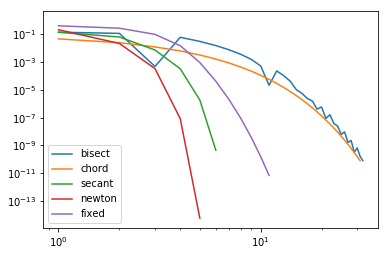

In [47]:
# plot the error convergence for the methods
loglog(errors_bisect, label='bisect')
loglog(errors_chord, label='chord')
loglog(errors_secant, label='secant')
loglog(errors_newton, label ='newton')
loglog(errors_fixed, label ='fixed')
_ = legend()

In [38]:
# Let's compare the scipy implmentation of Newton's method with our..

In [48]:
import scipy.optimize as opt
%time opt.newton(f, 1.0, f_prime, tol = eps)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 153 µs


0.90617984593866396